<a href="https://colab.research.google.com/github/LanaAlhussaini/G12.DM/blob/main/phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis-Phase 2

This notebook presents the data analysis stage of our project.  
The goal is to understand the dataset and extract useful insights before preprocessing and modeling.

The main steps include:

1. **Missing Values Check** - detect any missing data.  
2. **Five-number Summary** - observe the range and spread of numeric features.  
3. **Outliers Inspection** - identify extreme values using boxplots.  
4. **Histograms** - explore data distributions.  
5. **Scatter Plots** - study relationships between numeric variables.  
6. **Bar Plots** - analyze categorical attributes.  
7. **Class Label Distribution** - verify class balance for the target variable.


---




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (6, 4)
sns.set(style="whitegrid")

url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1




---


## Missing Values

We start by checking for any missing or null values to confirm data completeness.

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)
df.isna().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


**Interpretation:**  
No missing values were found. The dataset is complete and ready for analysis.


---
## Five-number Summary

We summarize key numeric attributes to understand their value ranges and spread.

**Selected attributes:**
- anxiety_level  
- depression  
- self_esteem  
- sleep_quality  
- study_load



In [ ]:
five_num = df[['anxiety_level','depression','self_esteem','sleep_quality','study_load']].describe().loc[['min','25%','50%','75%','max']]
five_num


,anxiety_level,depression,self_esteem,sleep_quality,study_load
min,0.0,0.0,0.0,0.0,0.0
25%,6.0,6.0,11.0,1.0,2.0
50%,11.0,12.0,19.0,2.5,2.0
75%,16.0,19.0,26.0,4.0,3.0
max,21.0,27.0,30.0,5.0,5.0


**Interpretation of Five Number Summary**:

The summary shows that most students have moderate anxiety (median = 11) and moderate depression (median = 12), but both variables have wide ranges, indicating possible outliers.
Self-esteem (median = 19) is generally high, while sleep quality (median = 2.5) and study load (median = 2) are around average levels.
Overall, the data suggests that stress-related factors vary widely among students, highlighting differences in their mental and academic conditions.




---


## Outliers Inspection (Boxplots)

Boxplots are used to visually identify extreme or unusual values.

**Selected attributes:**
- anxiety_level  
- depression  
- self_esteem




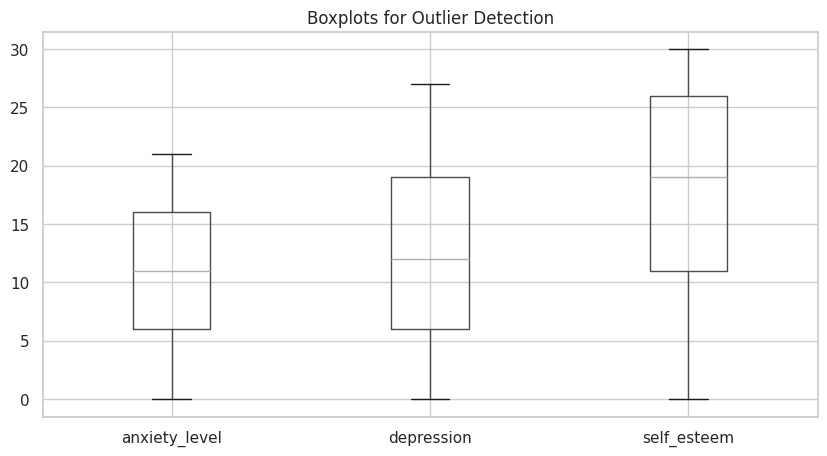

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['anxiety_level','depression','self_esteem']

plt.figure(figsize=(10,5))
df[cols].boxplot()
plt.title("Boxplots for Outlier Detection")
plt.show()


**Interpretation of Boxplot**:

The boxplots show the spread and symmetry of the main psychological variables.

* Most values fall within normal ranges, with no extreme outliers detected in
anxiety, depression, or self-esteem.

* Self-esteem displays a wider range, meaning students vary more in confidence levels compared to other factors.

* Depression appears slightly more variable than anxiety, suggesting some students experience higher depressive symptoms.


Overall, the distributions are balanced and clean, confirming that the dataset is suitable for further preprocessing and modeling.


---



## Histograms (Distributions)

Histograms show how numeric values are distributed across their ranges.

**Selected attributes:**
- sleep_quality  
- study_load  
- social_support


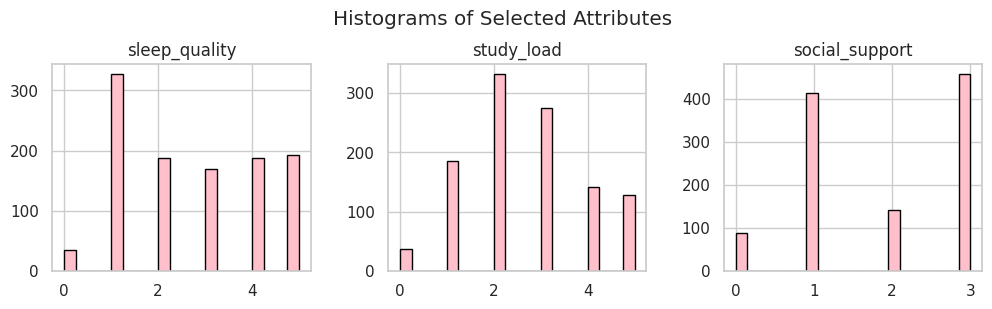

In [ ]:
cols_hist = ['sleep_quality','study_load','social_support']
df[cols_hist].hist(bins=20, layout=(1,3), figsize=(12,3), edgecolor='black' , color= 'pink')
plt.suptitle("Histograms of Selected Attributes")
plt.subplots_adjust(top=0.8)
plt.show()


**Interpretation of Histograms**:

The histograms show the distribution of selected attributes related to students'stress factors:



* Sleep Quality: Most students reported low sleep quality (around levels 1-2), suggesting that poor sleep might be common.

* Study Load: The distribution peaks around levels 2-3, indicating that most students experience a moderate workload.

* Social Support: The data is more polarized, with many students reporting either very low or very high support, implying differences in their social environments.

Overall, the variables show diverse distributions, reflecting how academic pressure, rest quality, and social factors vary across the student population.


---



## Scatter Plot (Distributions)

Scatter Plots show the realtionship between two numerical values.

**Selected attributes:**
- self_esteem  
- anxiety_level  

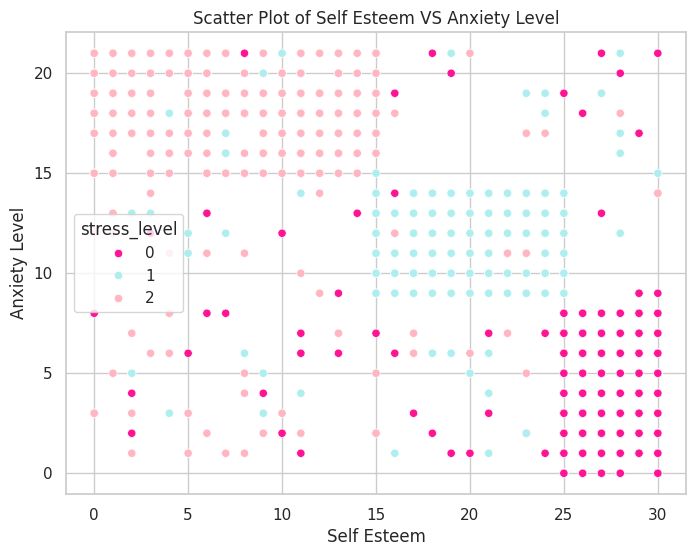

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='self_esteem' , y= 'anxiety_level' , data = df , hue= 'stress_level' , palette = ['#ff1493' , '#aeeeee' , '#ffb6c1'] )
plt.title('Scatter Plot of Self Esteem VS Anxiety Level')
plt.xlabel('Self Esteem')
plt.ylabel('Anxiety Level')
plt.show()

**Interpretation of Scatter Plot:**

This scatter plot shows the relationship between self-esteem and anxiety level between the participants.
 * There is a negative relationship since when self-esteem increases, anxiety levels tend to decrease.
 * The points are fairly distirbuted, suggesting that although the trend is mostly negative, there is still some variation among participants.
 * Participants with middle self-esteem show a wide range of anxiety levels, indicating that other factors might also influence anxiety.

Overall:
The scatter plot suggests that individuals with higher self-esteem mostly experience lower anxiety levels, showing a negative correlation between the two attributes.


# Scatter Plot (Distributions)

Another use of Scatter Plots to show the realtionship between two numerical values.

**Selected attributes:**
- depression  
- anxiety_level  

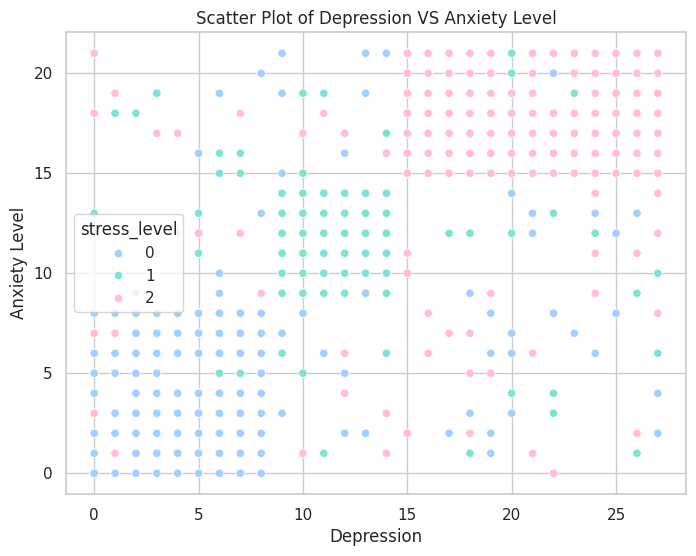

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='depression' , y= 'anxiety_level' , data = df , hue= 'stress_level' , palette = ['#a2cffe' , '#7fe3d3' , '#ffc0cb'] )
plt.title('Scatter Plot of Depression VS Anxiety Level')
plt.xlabel('Depression')
plt.ylabel('Anxiety Level')
plt.show()

**Interpretation of Scatter Plot:**

This scatter plot shows the relationship between depression and anxiety level among the participants.
 * There is a positive correlation since when anxiety levels increase, depression levels also increases.
 * Most points follow a rising trend, showing that higher anxiety is usually associated with higher depression scores.
 * A few data points fall behind from the general pattern, suggesting that some individuals might experience high anxiety without high depression, or the opposite.

Overall:
The scatter plot suggests a positive correlation between depression and anxiety level, meaning that participants with higher anxiety levels are generally more likely to show higher levels of depression

# Bar Plot (Distributions)

Bar Plots are used to compare categories or show the frequency of different goups.

**Selected attributes:**
- headache
  

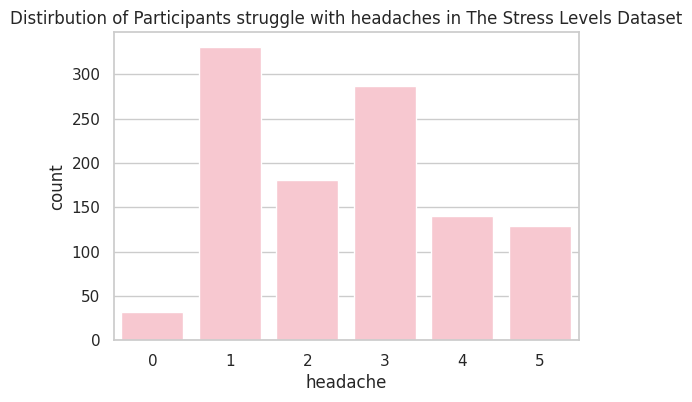

In [ ]:
sns.countplot(x='headache' , color='pink', data=df )
plt.title('Distirbution of Participants struggle with headaches in The Stress Levels Dataset')
plt.show()

**Interpretation of Bar Plot:**

This bar plot displays the distribution of the headache attribute among participants.
 * The dataset shows 32 participants without experiencing headaches (category 0).
 * 331 participants have a recorded very low headache (category 1).
 *181 participants have a recorded low headache (category 2).
* 287 participants have a recorded moderate headache (category 3).
* 140 participants have a recorded high headache (category 4).
* 129 participants have a recorded very high headache (category 5).
 * The 5 categories appear unbalanced, showing a relatively uneven distribution.

Overall:
The Bar Plot Shows Most participants reported mild to moderate headache levels (1–3), with fewer experiencing very high levels (4–5). Very few had no headaches at all. This suggests headache is a fairly common symptom in this dataset, peaking at moderate intensity.

# Class Label Bar Plot (Distributions)

Bar Plots are used to display the distirbutions of categorial data and show how many instances fall into which class.

**Selected attributes:**
- stress_level  

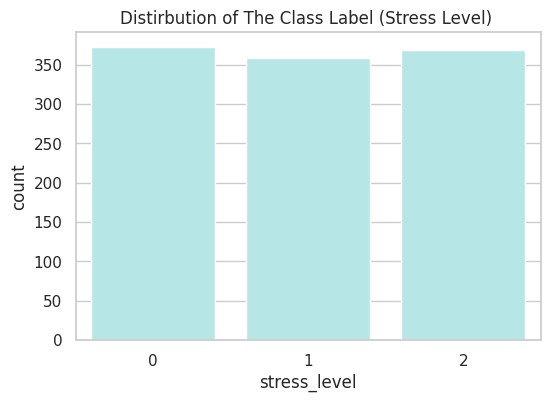

In [ ]:
sns.countplot(x='stress_level' , data = df , color = '#aeeeee')
plt.title('Distirbution of The Class Label (Stress Level) ')
plt.show()

**Interpretation of Bar Plot:**

This bar plot represents the distribution of the stress level attribute among participants.
 * There are 373 participants in the low stress category (0).
 * 358 participants fall into the medium stress category (1).
 * 369 participants are in the high stress category (2).
 * The frequencies of all three categories are very close to each other, showing not one is much higher than the rest of stress level groups in the dataset.

Overall:
The bar plot indicates a balanced distribution among the three stress level categories, with only small differences in counts. This suggests that stress levels are fairly evenly represented across participants.

## Summary

- No missing values were detected.  
- The five-number summary revealed varying ranges among numeric attributes.  
- Boxplots indicated potential outliers in anxiety and depression levels.  
- Histograms showed slightly skewed distributions in some variables.
- Scatter Plot (Depression vs Anxiety) Showed Positive correlation where higher anxiety is generally associated with higher depression.
-  Scatter Plot (Self-Esteem vs Anxiety) On the other hand showed Negative correlation where higher self-esteem tends to correspond with lower anxiety.
- Bar Plot (Headache) Gave an unbalanced distribution,fewer participants showed no signs of headache while the rest rested on a moderate average.
- Bar Plot (Class Label Stress Level) Presented a Balanced distribution where low, moderate, and high stress levels are fairly evenly represented.  



These findings will guide preprocessing, focusing on normalization and outlier handling.


# Outlier Detection using IQR
In this step, the **Interquartile Range (IQR)** method is used to detect and remove outliers.  
IQR represents the middle 50% of the data (between the first quartile Q1 and the third quartile Q3).  
Any data point outside this range is considered an outlier.

### Selected Attributes:
- anxiety_level
- depression
- self_esteem

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Preprocessed_dataset.csv"
df = pd.read_csv(url)

cols = ['anxiety_level', 'depression', 'self_esteem']

for column in cols:
    print(f"\nProcessing column: {column}")
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print("Number of outliers detected:", outliers.shape[0])
print("Final dataset shape:", df.shape)



Processing column: anxiety_level
Number of outliers detected: 0

Processing column: depression
Number of outliers detected: 0

Processing column: self_esteem
Number of outliers detected: 0
Final dataset shape: (1100, 21)


*italicized text*### Interpretation:
- After applying the IQR method to the columns (anxiety_level), (depression), and (self_esteem),  
  no values were found outside the lower or upper boundaries.  
- This means that all data points fall within the normal statistical range.  
- The dataset appears clean and free from extreme or unusual values, which indicates that the data collection was consistent.  
- Since no outliers were detected, no rows were removed from the dataset.

---------------------------------------------------------------------

### **Normalization**

Description

Normalization is a preprocessing technique that scales numerical features to a consistent range, typically between 0 and 1, ensuring that all features contribute equally to machine learning models. This is necessary because the dataset contained features with varying ranges, such as anxiety_level (0-21) and blood_pressure (1-3). Min-Max Scaling was used to bring these features to a comparable scale, preventing features with larger ranges from dominating the model’s learning process.

Attributes normalized:

anxiety_level, self_esteem, depression, headache, blood_pressure, sleep_quality, breathing_problem, noise_level, living_conditions, safety, basic_needs, academic_performance, study_load, teacher_student_relationship, future_career_concerns, social_support, peer_pressure, extracurricular_activities, bullying.

Note: Blood_pressure was considered numerical rather than interval because it represents a continuous scale and could be divided into intervals (low, normal, high), but treating it as numerical provides more flexibility in analysis.

Data before Normalization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Preprocessed_dataset.csv"
df = pd.read_csv(url)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


Data after Normalization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Preprocessed_dataset.csv"
df = pd.read_csv(url)
columns_to_normlize = ['anxiety_level' , 'self_esteem' , 'depression' ,
                       'headache','blood_pressure','breathing_problem' ,
                       'sleep_quality', 'noise_level' , 'living_conditions',
                       'safety', 'basic_needs','academic_performance','study_load',
                       'teacher_student_relationship','future_career_concerns',
                       'social_support','peer_pressure','extracurricular_activities','bullying']
scaler = MinMaxScaler()
df[columns_to_normlize] = scaler.fit_transform(df[columns_to_normlize])
print(df[columns_to_normlize])

      anxiety_level  self_esteem  depression  headache  blood_pressure  \
0          0.666667     0.666667    0.407407       0.4             0.0   
1          0.714286     0.266667    0.555556       1.0             1.0   
2          0.571429     0.600000    0.518519       0.4             0.0   
3          0.761905     0.400000    0.555556       0.8             1.0   
4          0.761905     0.933333    0.259259       0.4             1.0   
...             ...          ...         ...       ...             ...   
1095       0.523810     0.566667    0.518519       0.6             0.0   
1096       0.428571     0.400000    0.296296       0.0             1.0   
1097       0.190476     0.866667    0.111111       0.2             0.5   
1098       1.000000     0.000000    0.703704       1.0             1.0   
1099       0.857143     0.200000    0.555556       0.6             1.0   

      breathing_problem  sleep_quality  noise_level  living_conditions  \
0                   0.8            0.

By applying Normalization, the numerical features in the dataset were standardized to a uniform scale, ensuring that no feature with a larger range dominated the model’s learning process. This improvement made the dataset more consistent, balanced, and suitable for machine learning models, enhancing their ability to process all features equally and improving overall model performance.

---------------------------------------------------------------------

#  Feature Selection: chi-square


Feature selection was applied to identify the most significant attributes influencing students’ stress levels. Using the Chi-squared (χ²) statistical test, features were ranked based on their correlation with the target variable (stress_level). This method was chosen to remove less relevant attributes, reduce dimensionality, and improve model interpretability and efficiency.

Before Feature Selection:

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Preprocessed_dataset.csv"
df = pd.read_csv(url)


print("Dataset before Feature Selection:")
print(df.columns)


Dataset before Feature Selection:
Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


After Feature Selection:

mental_health_history           234.803053
blood_pressure                  215.984923
sleep_quality                   111.774047
bullying                        111.243192
future_career_concerns          107.722084
depression                      105.172223
self_esteem                      96.560711
anxiety_level                    96.375981
social_support                   93.960090
headache                         88.722438
academic_performance             85.373125
basic_needs                      85.140418
safety                           83.837721
peer_pressure                    80.952641
extracurricular_activities       79.899465
teacher_student_relationship     76.900112
noise_level                      65.211423
study_load                       58.711826
breathing_problem                52.712701
living_conditions                37.005998
dtype: float64


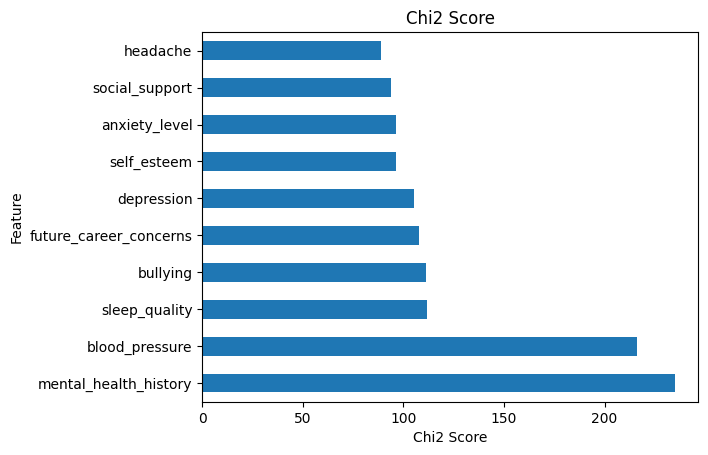

Dataset After Feature Selection: Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'future_career_concerns',
       'social_support', 'bullying'],
      dtype='object')


In [5]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import pandas as pd

url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Preprocessed_dataset_normalized.csv"
df = pd.read_csv(url)
X = df.drop('stress_level', axis=1)
y = df['stress_level']

selector = SelectKBest(score_func=chi2, k=10)
X_new = selector.fit_transform(X, y)
scores = pd.Series(selector.scores_, index=X.columns)
sorted_scores = scores.sort_values(ascending=False)

print(sorted_scores)

sorted_scores.head(10).plot(kind='barh', title='Chi2 Score')
plt.xlabel('Chi2 Score')
plt.ylabel('Feature')
plt.show()

selected_features = X.columns[selector.get_support()]
print("Dataset After Feature Selection:", selected_features)

df_fs = df.loc[:, list(selected_features) + ['stress_level']]
df_fs.to_csv("Preprocessed_dataset_feature_selection.csv",index=False)

The resulting dataset retained only the most impactful features—such as anxiety_level, academic_pressure, and sleep_quality—making it more focused and better prepared for accurate and efficient classification analysis.

## Row Dataset

In [ ]:
url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Raw_dataset.csv"
df = pd.read_csv(url)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


## Preprocessed Dataset

In [6]:
url="https://raw.githubusercontent.com/LanaAlhussaini/G12.DM/refs/heads/main/Dataset/Preprocessed_dataset_feature_selection.csv"
df = pd.read_csv(url)
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,future_career_concerns,social_support,bullying,stress_level
0,0.666667,0.666667,0,0.407407,0.4,0.0,0.4,0.6,0.666667,0.4,1
1,0.714286,0.266667,1,0.555556,1.0,1.0,0.2,1.0,0.333333,1.0,2
2,0.571429,0.600000,1,0.518519,0.4,0.0,0.4,0.4,0.666667,0.4,1
3,0.761905,0.400000,1,0.555556,0.8,1.0,0.2,0.8,0.333333,1.0,2
4,0.761905,0.933333,0,0.259259,0.4,1.0,1.0,0.4,0.333333,1.0,1
